<a href="https://colab.research.google.com/github/Dark7121/Handwritten-Recognition-Using-Deep-Learning/blob/main/Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
from keras.preprocessing import image
from google.colab import files
from google.colab.patches import cv2_imshow

In [ ]:
mnist= tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test)= mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train= tf.keras.utils.normalize (x_train, axis=1)
x_test= tf.keras.utils.normalize (x_test, axis=1)

In [ ]:
x_trainr= np.array(x_train).reshape(-1, 28, 28, 1)
x_testr= np.array(x_test).reshape(-1, 28, 28, 1)

In [ ]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:])) 
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2))) 

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add (Flatten())
model.add (Dense (64)) 
model.add(Activation("relu"))

model.add (Dense(32))
model.add(Activation("relu"))

model.add(Dense (10))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [ ]:
model.compile(loss= "sparse_categorical_crossentropy", optimizer= "adam", metrics=['accuracy'])

In [ ]:
model.fit(x_trainr,y_train,epochs=6, validation_split=0.3)

Epoch 1/6
1313/1313 [==============================] - 94s 70ms/step - loss: 0.3180 - accuracy: 0.9005 - val_loss: 0.1140 - val_accuracy: 0.9652
Epoch 2/6
1313/1313 [==============================] - 78s 59ms/step - loss: 0.1025 - accuracy: 0.9686 - val_loss: 0.0989 - val_accuracy: 0.9687
Epoch 3/6
1313/1313 [==============================] - 78s 59ms/step - loss: 0.0732 - accuracy: 0.9774 - val_loss: 0.0799 - val_accuracy: 0.9761
Epoch 4/6
1313/1313 [==============================] - 80s 61ms/step - loss: 0.0561 - accuracy: 0.9830 - val_loss: 0.0783 - val_accuracy: 0.9772
Epoch 5/6
1313/1313 [==============================] - 75s 57ms/step - loss: 0.0432 - accuracy: 0.9862 - val_loss: 0.0590 - val_accuracy: 0.9836
Epoch 6/6
1313/1313 [==============================] - 81s 62ms/step - loss: 0.0373 - accuracy: 0.9880 - val_loss: 0.0570 - val_accuracy: 0.9833


In [ ]:
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test Loss on Test Data:", test_loss)
print("Test Accuracy on Test Data:", test_acc)

313/313 [==============================] - 4s 14ms/step - loss: 0.0584 - accuracy: 0.9826
Test Loss on Test Data: 0.05839963257312775
Test Accuracy on Test Data: 0.9825999736785889


In [ ]:
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test Loss on Test Data:", test_loss)
print("Test Accuracy on Test Data:", test_acc)

313/313 [==============================] - 6s 18ms/step - loss: 0.0584 - accuracy: 0.9826
Test Loss on Test Data: 0.05839963257312775
Test Accuracy on Test Data: 0.9825999736785889


In [ ]:
model.save("digit_recognize")
model.save_weights("digit_recognize.h5")

In [ ]:
digit_recognize = tf.keras.models.load_model('digit_recognize')
model.load_weights('digit_recognize.h5')

In [ ]:
predictions = digit_recognize.predict([x_testr])
print(predictions)

313/313 [==============================] - 4s 14ms/step
[[6.57164918e-08 2.52707305e-05 3.26039617e-06 ... 9.99895394e-01
  1.95181087e-06 4.23381462e-05]
 [1.01244019e-07 1.29763760e-06 9.99996006e-01 ... 1.35063189e-07
  1.17122499e-06 8.28482949e-10]
 [7.59279217e-08 9.99972165e-01 1.32356945e-06 ... 9.75002695e-06
  1.04879600e-05 1.50047811e-07]
 ...
 [2.07653495e-11 5.61745006e-09 7.78585182e-11 ... 1.09712799e-08
  1.05916108e-07 8.31748309e-07]
 [3.82924910e-08 1.52251669e-08 8.63256844e-09 ... 1.31981326e-09
  4.55953113e-06 4.92297431e-07]
 [5.64492038e-05 1.99308124e-06 1.07076215e-04 ... 1.18060927e-06
  5.05085802e-04 1.00143279e-05]]


8


(28, 28)

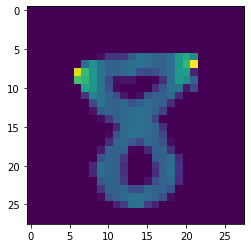

In [ ]:
print(np.argmax(predictions[128]))
plt.imshow(x_test[128])
x_test[128].shape

In [ ]:
uploaded= files.upload()

Saving 1.png to 1.png


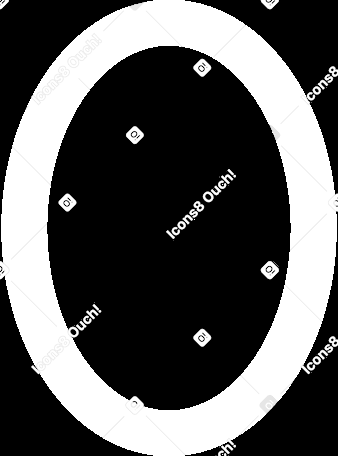

(1, 28, 28, 1)
1/1 [==============================] - 0s 36ms/step
0


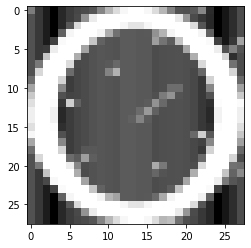

In [ ]:
img = cv2.imread("1.png", cv2.IMREAD_COLOR)
cv2_imshow(img)
myGrayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh= cv2.threshold(myGrayImg, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
im2 = 255 - thresh
cv2.imwrite("newim.png", thresh)
newim= cv2.imread("newim.png") [:, :, 0] 
resized_img = cv2.resize(newim, (28, 28), interpolation = cv2.INTER_AREA,)
newimg = np.array(resized_img).reshape(-1, 28, 28, 1)
newimg = tf.keras.utils.normalize (newimg, axis=1)
if newimg.shape[2] == 1:
    newimg = newimg[:, :, ::-1]       
    
plt.imshow(tf.squeeze(newimg), cmap=plt.cm.binary) 
print(newimg.shape)

predictions = digit_recognize.predict(newimg)
print(np.argmax(predictions))